In [1]:
!python -m spacy download en_core_web_lg

     -------------------------------------- 587.7/587.7 MB 3.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing the IMDB Dataset

In [3]:
import pandas as pd
data = pd.read_csv(r'C:\Users\dipti\Downloads\IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### Data Pre-processing: Convert Review's column into lowercase, remove stop-words, lemmatize

In [5]:
import spacy #load spacy
nlp = spacy.load("en_core_web_lg")
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)
data['processed'] = data['review'].apply(normalize, lowercase=True, remove_stopwords=True)

In [6]:
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=5)

In [20]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 3000, binary = True)
X_train_vect = cv.fit_transform(X_train)
X_train_vect.shape

(40000, 3000)

In [21]:
df = pd.DataFrame(X_train_vect.toarray(), columns=cv.get_feature_names())
df.head()

C:\Users\dipti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,000,1,10,100,11,12,13,14,15,...,years,yes,york,young,younger,youth,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
cv.vocabulary_

{'excellent': 901,
 'reason': 2121,
 'went': 2923,
 'straight': 2527,
 'video': 2848,
 'theaters': 2675,
 'movie': 1757,
 'entirely': 868,
 'long': 1586,
 'boring': 317,
 'just': 1455,
 'notch': 1819,
 'thanks': 2672,
 'obviously': 1840,
 'weeks': 2919,
 'films': 1021,
 'bad': 236,
 'guys': 1200,
 'laughable': 1514,
 'action': 66,
 'near': 1789,
 'non': 1811,
 'existent': 913,
 's': 2250,
 'acting': 65,
 'hate': 1230,
 'guy': 1199,
 'realizes': 2119,
 'pop': 1984,
 'better': 282,
 'br': 328,
 'isn': 1410,
 't': 2617,
 'like': 1561,
 'fact': 948,
 'll': 1578,
 'cool': 571,
 'j': 1415,
 'given': 1140,
 'appears': 172,
 'shot': 2364,
 'leading': 1525,
 'man': 1641,
 'deserves': 701,
 'unlike': 2811,
 'fellow': 1000,
 'star': 2482,
 'act': 63,
 'kevin': 1464,
 'enjoyable': 857,
 'times': 2706,
 'scenery': 2278,
 'ability': 44,
 'flick': 1043,
 'stars': 2485,
 'good': 1154,
 'said': 2254,
 'ultimate': 2784,
 'piece': 1947,
 'fails': 953,
 'make': 1634,
 'crap': 595,
 'characters': 436,
 'pl

In [23]:
X_test_vect= cv.transform(X_test)
X_test_vect.shape

(10000, 3000)

### Importing VADER Lexicon Sentiment Analyzer

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dipti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
analyzer = SentimentIntensityAnalyzer()
data['polarity'] = data['review'].apply(lambda x: analyzer.polarity_scores(x))
data

,review,sentiment,processed,polarity,compound,label
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch 1 oz episode hook . rig...,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co...",-0.9951,Negative
1,A wonderful little production. <br /><br />The...,positive,wonderful little production . < br /><br />the...,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co...",0.9641,Positive
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co...",0.9605,Positive
3,Basically there's a family where a little boy ...,negative,basically family little boy ( jake ) think zom...,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",-0.9213,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei "" love time money "" visually stu...","{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...",0.9744,Positive
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,think movie right good job . creative original...,"{'neg': 0.047, 'neu': 0.753, 'pos': 0.199, 'co...",0.9890,Positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot , bad dialogue , bad acting , idiotic...","{'neg': 0.166, 'neu': 0.72, 'pos': 0.114, 'com...",-0.6693,Negative
49997,I am a Catholic taught in parochial elementary...,negative,catholic teach parochial elementary school nun...,"{'neg': 0.208, 'neu': 0.683, 'pos': 0.108, 'co...",-0.9851,Negative
49998,I'm going to have to disagree with the previou...,negative,go disagree previous comment maltin . second r...,"{'neg': 0.105, 'neu': 0.813, 'pos': 0.082, 'co...",-0.7648,Negative


In [11]:
#data.to_csv('IMDBsentiment_analysis_output.csv')

In [26]:
data['compound'] = data['polarity'].apply(lambda x: x.get('compound'))

In [27]:
# Define a function to map the sentiment score to a sentiment category
def map_sentiment(score):
    if score <= -0.05:
        return 'Negative'
    elif score >-0.05 and score<0.05:
        return 'Neutral'
    elif score>=0.05:
        return 'Positive'
data['label'] = data['compound'].apply(map_sentiment)

In [28]:
data

,review,sentiment,processed,polarity,compound,label
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch 1 oz episode hook . rig...,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co...",-0.9951,Negative
1,A wonderful little production. <br /><br />The...,positive,wonderful little production . < br /><br />the...,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co...",0.9641,Positive
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co...",0.9605,Positive
3,Basically there's a family where a little boy ...,negative,basically family little boy ( jake ) think zom...,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",-0.9213,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei "" love time money "" visually stu...","{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...",0.9744,Positive
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,think movie right good job . creative original...,"{'neg': 0.047, 'neu': 0.753, 'pos': 0.199, 'co...",0.9890,Positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot , bad dialogue , bad acting , idiotic...","{'neg': 0.166, 'neu': 0.72, 'pos': 0.114, 'com...",-0.6693,Negative
49997,I am a Catholic taught in parochial elementary...,negative,catholic teach parochial elementary school nun...,"{'neg': 0.208, 'neu': 0.683, 'pos': 0.108, 'co...",-0.9851,Negative
49998,I'm going to have to disagree with the previou...,negative,go disagree previous comment maltin . second r...,"{'neg': 0.105, 'neu': 0.813, 'pos': 0.082, 'co...",-0.7648,Negative


### Naive Bayes Classification

In [30]:
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_vect, Y_train)

MultinomialNB()

In [31]:
#Evaluate the performance of the model
from sklearn import metrics
predicted = MNB.predict(X_test_vect)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4900
           1       0.87      0.85      0.86      5100

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### SVM

In [33]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_vect, Y_train)

SVC()

In [34]:
from sklearn import metrics
predicted = clf.predict(X_test_vect)
performance = metrics.classification_report(Y_test, predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4900
           1       0.89      0.91      0.90      5100

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### TFIDF 

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
vectorizer = TfidfVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(40000, 800)

In [40]:
df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names())
df.head()

C:\Users\dipti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,10,2,20,3,30,4,5,6,7,...,writers,writing,written,wrong,year,years,yes,york,young,zombie
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0
2,0.047737,0.039139,0.044208,0.0,0.048772,0.0,0.052467,0.052902,0.000000,0.0,...,0.0,0.0,0.050492,0.049197,0.093737,0.000000,0.05167,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.157917,0.0,...,0.0,0.0,0.000000,0.000000,0.115493,0.094848,0.00000,0.0,0.0,0.0
4,0.000000,0.083970,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0


In [42]:
X_test_tfidf= vectorizer.transform(X_test)
X_test_tfidf.shape

(10000, 800)

### Naive Bayes (TFIDF)

In [43]:
MNB = MultinomialNB()
MNB.fit(X_train_tfidf, Y_train)
predicted = MNB.predict(X_test_tfidf)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4900
           1       0.84      0.86      0.85      5100

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### SVM

In [44]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_tfidf, Y_train)

SVC()

In [46]:
from sklearn import metrics
predicted = clf.predict(X_test_tfidf)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4900
           1       0.86      0.88      0.87      5100

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



### Bag of Words

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
X_train_vect = cv.fit_transform(X_train)
X_train_vect.shape


(40000, 800)

In [48]:
X_test_vect= cv.transform(X_test)
X_test_vect.shape

(10000, 800)

### Naive Bayes (Count)

In [49]:
MNB = MultinomialNB()
MNB.fit(X_train_vect, Y_train)
predicted = MNB.predict(X_test_vect)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4900
           1       0.83      0.84      0.84      5100

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



### SVM

In [50]:
clf = svm.SVC()
clf.fit(X_train_vect, Y_train)
predicted = clf.predict(X_test_vect)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4900
           1       0.85      0.88      0.86      5100

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Bag of Words Binary

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800, binary=True)
X_train_binary = cv.fit_transform(X_train)
X_train_binary.shape

(40000, 800)

In [52]:
X_test_binary = cv.transform(X_test)
X_test_binary.shape

(10000, 800)

### Naive Bayes

In [53]:
MNB = MultinomialNB()
MNB.fit(X_train_binary, Y_train)
predicted = MNB.predict(X_test_binary)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4900
           1       0.84      0.85      0.84      5100

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### SVM

In [54]:
clf = svm.SVC()
clf.fit(X_train_binary, Y_train)
predicted = clf.predict(X_test_binary)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4900
           1       0.86      0.88      0.87      5100

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## Evaluating the impact of the number of features 

### 800 Features 

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 800)
#cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 3000, binary = True)
X_train_800 = cv.fit_transform(X_train)
X_test_800= cv.transform(X_test)


### Naive Bayes

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MNB = MultinomialNB()
MNB.fit(X_train_800, Y_train)
predicted = MNB.predict(X_test_800)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      4900
           1       0.83      0.84      0.83      5100

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



### SVM

In [57]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_800, Y_train)
predicted = clf.predict(X_test_800)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4900
           1       0.85      0.87      0.86      5100

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### 1000 Features

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 1000)
X_train_1k = cv.fit_transform(X_train)
X_test_1k= cv.transform(X_test)

### Naive Bayes

In [59]:
MNB = MultinomialNB()
MNB.fit(X_train_1k, Y_train)
predicted = MNB.predict(X_test_1k)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4900
           1       0.83      0.84      0.84      5100

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



### SVM

In [60]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_1k, Y_train)
predicted = clf.predict(X_test_1k)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4900
           1       0.86      0.88      0.87      5100

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### 2000 Features

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 2000)
X_train_2k = cv.fit_transform(X_train)
X_test_2k= cv.transform(X_test)

### Naive Bayes

In [62]:
MNB = MultinomialNB()
MNB.fit(X_train_2k, Y_train)
predicted = MNB.predict(X_test_2k)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      4900
           1       0.85      0.84      0.84      5100

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### SVM

In [63]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_2k, Y_train)
predicted = clf.predict(X_test_2k)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4900
           1       0.87      0.89      0.88      5100

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### 4000 Features

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize, max_features = 4000)
X_train_4k = cv.fit_transform(X_train)
X_test_4k= cv.transform(X_test)

### Naive Bayes

In [65]:
MNB = MultinomialNB()
MNB.fit(X_train_4k, Y_train)
predicted = MNB.predict(X_test_4k)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4900
           1       0.86      0.84      0.85      5100

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### SVM

In [66]:
clf = svm.SVC()
clf.fit(X_train_4k, Y_train)
predicted = clf.predict(X_test_4k)
performance = metrics.classification_report(Y_test,predicted, target_names= ['0', '1'])
print(performance)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4900
           1       0.87      0.90      0.88      5100

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Naive Bayes
After analyzing various model configurations on the Naive Bayes model and testing the model with different number of features, I observed the following-
- Accuracy score for the model with TFIDF is 84%
- Accuracy score for Bag of Words(Binary)(84%) is slightly better than Count Vectorizer (83%) without the Binary parameter
- The Accuracy score for Naive Bayes went on increasing as the number of features increased, maximum of 85% with 4000 features

### Support Vector Machine
After analyzing various model configurations on the SVM model and testing the model with different number of features, I observed the following-
- Accuracy score for the model with TFIDF is 86%
- Accuracy score for Bag of Words(Binary)(87%) is slightly better than Count Vectorizer (86%) without the Binary parameter
- The Accuracy score for SVM went on increasing as the number of features increased, maximum of 88% with 4000 features

## LSTM for Sentiment Analysis

In [69]:
pip install WordCloud

     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import json
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [71]:
# Method to plot models accuracy/loss

def plot_history(history):
    
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='green', lw='2')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='orangered', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='green', lw='2')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orangered', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [72]:
print('No. of rows and columns :', data.shape)
data.head()

No. of rows and columns : (50000, 6)


,review,sentiment,processed,polarity,compound,label
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch 1 oz episode hook . rig...,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co...",-0.9951,Negative
1,A wonderful little production. <br /><br />The...,positive,wonderful little production . < br /><br />the...,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co...",0.9641,Positive
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co...",0.9605,Positive
3,Basically there's a family where a little boy ...,negative,basically family little boy ( jake ) think zom...,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",-0.9213,Negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei "" love time money "" visually stu...","{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...",0.9744,Positive


In [73]:
df= data.loc[:5000,:]

In [75]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['sentiment'])
df['labels'] = label_encoder.transform(df['sentiment'])

C:\Users\dipti\AppData\Local\Temp\ipykernel_28572\2408058979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = label_encoder.transform(df['sentiment'])


In [77]:
# train-test split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df['review'], df['labels'], test_size=0.2, random_state=5, stratify=df['labels'])


In [78]:
# model parameters
embedding_dim = 100
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>" # out of vocabulary

# tokenize sentences
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# convert validation dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)


vocab_size = len(word_index)

In [79]:
print(vocab_size)

38502


In [80]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [85]:
# load the pre-trained GloVe word embeddings
EMBEDDING_FILE = r'C:\Users\dipti\Downloads\glove.6B\glove.6B.100d.txt'
word_vectors = {}
with open(EMBEDDING_FILE, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        word_vectors[word] = coefs

In [86]:
# create the embedding matrix
embedding_matrix = np.zeros((vocab_size + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = word_vectors.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [92]:
# LSTM model with trainable word embeddings word2vec

# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 100)          3850200   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,894,025
Trainable params: 3,894,025
Non-trainable params: 0
_________________________________________________________________


In [93]:
# fit model
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

num_epochs = 50
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, callbacks=[early_stop],
                    validation_split=0.3)

Epoch 1/50
88/88 [==============================] - 9s 83ms/step - loss: 0.6895 - accuracy: 0.5464 - val_loss: 0.6476 - val_accuracy: 0.6758
Epoch 2/50
88/88 [==============================] - 7s 80ms/step - loss: 0.5664 - accuracy: 0.7154 - val_loss: 0.5250 - val_accuracy: 0.7375
Epoch 3/50
88/88 [==============================] - 8s 86ms/step - loss: 0.3096 - accuracy: 0.8714 - val_loss: 0.5196 - val_accuracy: 0.7658
Epoch 4/50
88/88 [==============================] - 7s 85ms/step - loss: 0.1566 - accuracy: 0.9486 - val_loss: 0.5444 - val_accuracy: 0.7767
Epoch 5/50
88/88 [==============================] - 7s 75ms/step - loss: 0.0919 - accuracy: 0.9743 - val_loss: 0.5889 - val_accuracy: 0.7967
Epoch 6/50
88/88 [==============================] - 7s 76ms/step - loss: 0.0410 - accuracy: 0.9893 - val_loss: 0.7134 - val_accuracy: 0.8033
Epoch 7/50
88/88 [==============================] - 7s 76ms/step - loss: 0.0206 - accuracy: 0.9961 - val_loss: 0.7958 - val_accuracy: 0.8083
Epoch 8/50
88

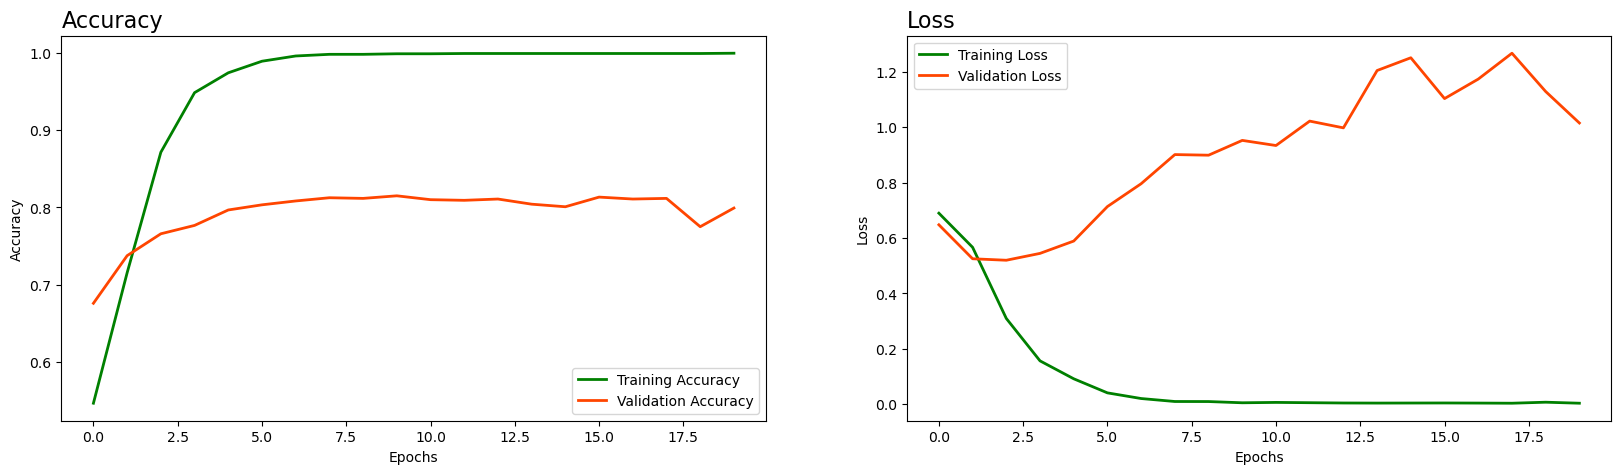

In [94]:
plot_history(history)

In [95]:
results = model.evaluate(test_padded, test_labels, verbose=1)

32/32 [==============================] - 0s 14ms/step - loss: 1.1874 - accuracy: 0.7702


In [105]:
# LSTM model with trainable word embeddings word2vec

# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 100)          3850200   
                                                                 
 lstm_4 (LSTM)               (None, 64)                42240     
                                                                 
 dense_8 (Dense)             (None, 24)                1560      
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,894,025
Trainable params: 3,894,025
Non-trainable params: 0
_________________________________________________________________


In [106]:
# fit model
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

num_epochs = 50
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, callbacks=[early_stop],
                    validation_split=0.3)

Epoch 1/50
88/88 [==============================] - 9s 81ms/step - loss: 0.6466 - accuracy: 0.6157 - val_loss: 0.5384 - val_accuracy: 0.7408
Epoch 2/50
88/88 [==============================] - 7s 78ms/step - loss: 0.3163 - accuracy: 0.8811 - val_loss: 0.4424 - val_accuracy: 0.8025
Epoch 3/50
88/88 [==============================] - 7s 78ms/step - loss: 0.0898 - accuracy: 0.9711 - val_loss: 0.5861 - val_accuracy: 0.7733
Epoch 4/50
88/88 [==============================] - 7s 77ms/step - loss: 0.0474 - accuracy: 0.9879 - val_loss: 0.8379 - val_accuracy: 0.7867
Epoch 5/50
88/88 [==============================] - 7s 75ms/step - loss: 0.0141 - accuracy: 0.9979 - val_loss: 0.6100 - val_accuracy: 0.8175
Epoch 6/50
88/88 [==============================] - 7s 75ms/step - loss: 0.0199 - accuracy: 0.9957 - val_loss: 0.8189 - val_accuracy: 0.7992
Epoch 7/50
88/88 [==============================] - 7s 75ms/step - loss: 0.0648 - accuracy: 0.9871 - val_loss: 1.4428 - val_accuracy: 0.6867
Epoch 8/50
88

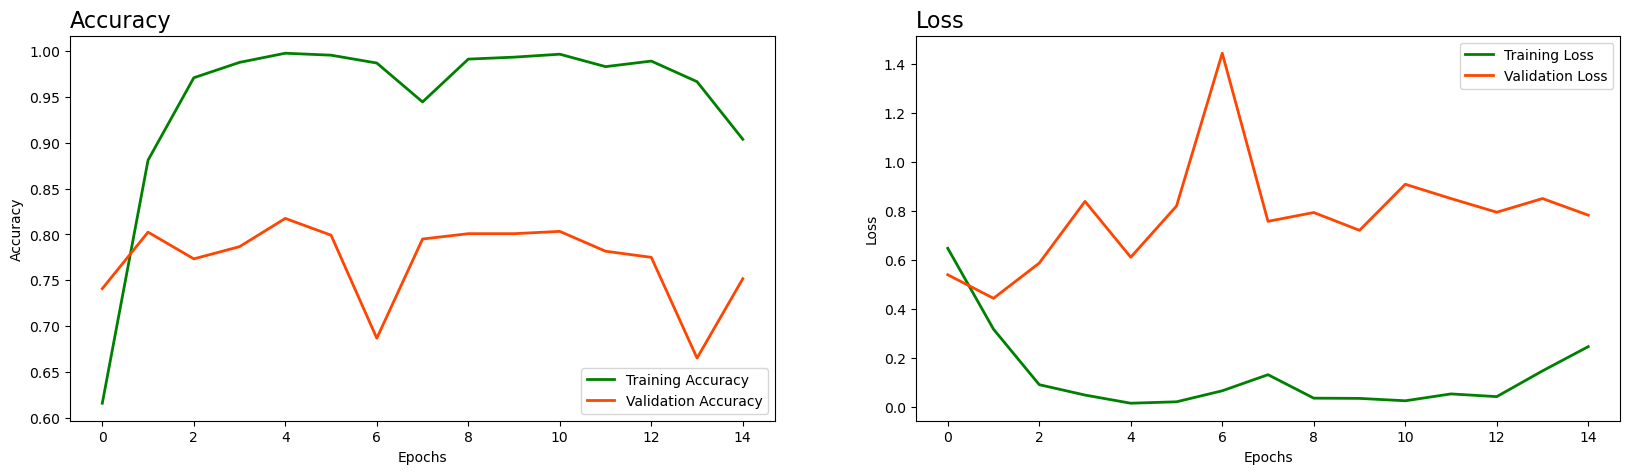

In [107]:
plot_history(history)

In [108]:
results = model.evaluate(test_padded, test_labels, verbose=1)

32/32 [==============================] - 0s 12ms/step - loss: 0.7316 - accuracy: 0.7902


In [109]:
# LSTM model with trainable word embeddings word2vec

# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 100)          3850200   
                                                                 
 lstm_5 (LSTM)               (None, 64)                42240     
                                                                 
 dense_10 (Dense)            (None, 24)                1560      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 3,894,025
Trainable params: 3,894,025
Non-trainable params: 0
_________________________________________________________________


In [110]:
# fit model
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

num_epochs = 50
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, callbacks=[early_stop],
                    validation_split=0.3)

Epoch 1/50
88/88 [==============================] - 9s 80ms/step - loss: 0.6765 - accuracy: 0.4839 - val_loss: 0.6474 - val_accuracy: 0.5167
Epoch 2/50
88/88 [==============================] - 7s 75ms/step - loss: 0.4211 - accuracy: 0.4839 - val_loss: 0.4276 - val_accuracy: 0.5167
Epoch 3/50
88/88 [==============================] - 7s 75ms/step - loss: 0.1276 - accuracy: 0.4839 - val_loss: 0.6774 - val_accuracy: 0.5167
Epoch 4/50
88/88 [==============================] - 7s 75ms/step - loss: 0.0354 - accuracy: 0.4839 - val_loss: 0.5671 - val_accuracy: 0.5167
Epoch 5/50
88/88 [==============================] - 7s 75ms/step - loss: 0.0637 - accuracy: 0.4839 - val_loss: 0.7169 - val_accuracy: 0.5167
Epoch 6/50
88/88 [==============================] - 7s 75ms/step - loss: 0.2095 - accuracy: 0.4839 - val_loss: 0.6871 - val_accuracy: 0.5167
Epoch 7/50
88/88 [==============================] - 7s 75ms/step - loss: 0.1017 - accuracy: 0.4839 - val_loss: 0.6741 - val_accuracy: 0.5167
Epoch 8/50
88

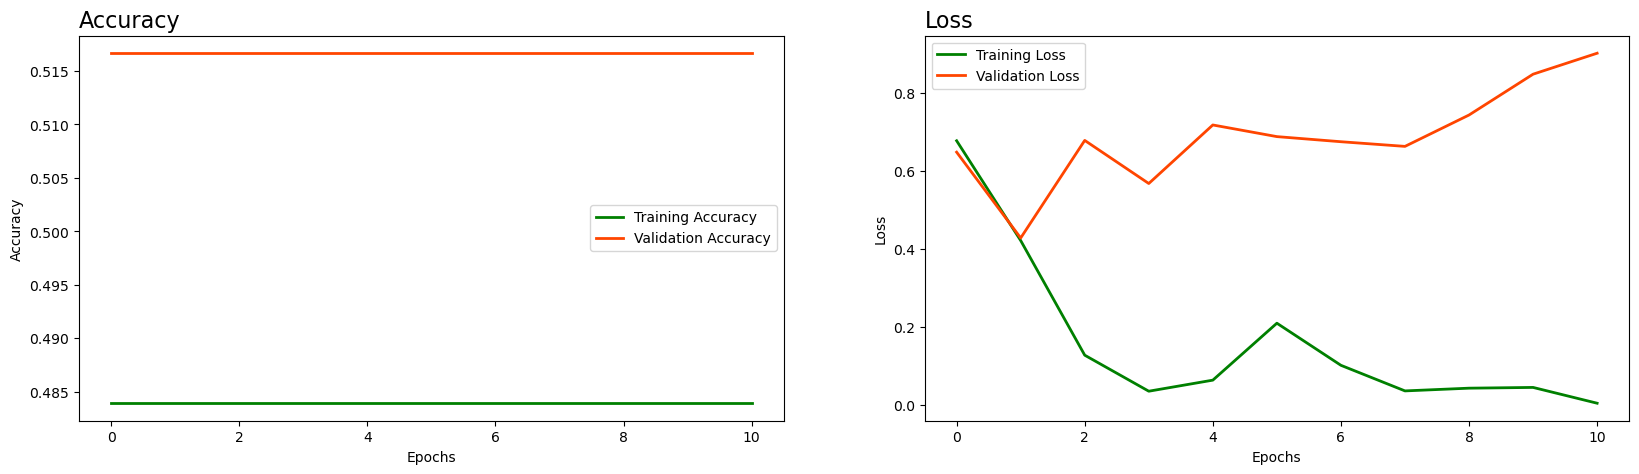

In [111]:
plot_history(history)

In [112]:
results = model.evaluate(test_padded, test_labels, verbose=1)

32/32 [==============================] - 0s 12ms/step - loss: 0.6463 - accuracy: 0.4935


### Bidirectional LSTM for Sentiment Analysis
After making variations in the activation functions of the dense layers of the LSTM Model, following can be observed
- The Accuracy for the LSTM model with Dense Layer activation combinations of Tanh and Sigmoid gave the maximum accuracy of 0.7902
- The combination of ReLU and SoftMax gave the lowest accuracy of 0.4935

We worked with several models to perform Sentiment Analysis of the IMDB Dataset such as:
- VADER Lexicon
- Naive Bayes
- SVM and
- Bidirectional LSTM (Deep Learning)
The movie reviews had negative and positive sentiments and based on tweaking the model parameters and # of Features used to run the model we observed that the <b>Support Vector Machine<\b> model with <b>4000<\b> had the highest accuracy score of 88% in Sentiment Analysis